In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
letak_file = "C:/Users/ASUS/Documents/data mining/pandasku/Daily-UpdateIDN-COVID19-Sheet5.csv"

fileku = pd.read_csv(letak_file)

In [2]:
fileku = fileku.loc[1:,:]
fileku.head()

,Date,Cumulative_cases,Recovered_cases,Total_death,Patient_under_treatment,New_case_perDay,Recovered-cases_perDay,Death_cases_perDay,Treatment_cases_perDay
1,2020-03-02,2,NaN,NaN,2,2.0,NaN,NaN,2.0
2,2020-03-03,2,NaN,NaN,2,2.0,NaN,NaN,2.0
3,2020-03-04,2,NaN,NaN,2,2.0,NaN,NaN,2.0
4,2020-03-05,2,NaN,NaN,2,2.0,NaN,NaN,2.0
5,2020-03-06,4,NaN,NaN,4,2.0,NaN,NaN,2.0


In [3]:
print(fileku.shape)
fileku.info()

(256, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 1 to 256
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     256 non-null    object 
 1   Cumulative_cases         256 non-null    object 
 2   Recovered_cases          248 non-null    object 
 3   Total_death              247 non-null    object 
 4   Patient_under_treatment  256 non-null    object 
 5   New_case_perDay          256 non-null    float64
 6   Recovered-cases_perDay   248 non-null    float64
 7   Death_cases_perDay       247 non-null    float64
 8   Treatment_cases_perDay   256 non-null    float64
dtypes: float64(4), object(5)
memory usage: 18.1+ KB


In [4]:
pengecek_null = fileku[fileku.columns].isna().sum()
pengecek_null = pengecek_null[pengecek_null !=0]

In [5]:
pengecek_null.index

Index(['Recovered_cases', 'Total_death', 'Recovered-cases_perDay',
       'Death_cases_perDay'],
      dtype='object')

In [6]:
for i in pengecek_null.index:
    fileku[i].fillna(0,inplace=True)

In [7]:
fileku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 1 to 256
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     256 non-null    object 
 1   Cumulative_cases         256 non-null    object 
 2   Recovered_cases          256 non-null    object 
 3   Total_death              256 non-null    object 
 4   Patient_under_treatment  256 non-null    object 
 5   New_case_perDay          256 non-null    float64
 6   Recovered-cases_perDay   256 non-null    float64
 7   Death_cases_perDay       256 non-null    float64
 8   Treatment_cases_perDay   256 non-null    float64
dtypes: float64(4), object(5)
memory usage: 18.1+ KB


# Set_index

In [8]:
fileku.set_index("Date",inplace=True)

In [9]:
fileku.head()

,Cumulative_cases,Recovered_cases,Total_death,Patient_under_treatment,New_case_perDay,Recovered-cases_perDay,Death_cases_perDay,Treatment_cases_perDay
Date,,,,,,,,
2020-03-02,2,0,0,2,2.0,0.0,0.0,2.0
2020-03-03,2,0,0,2,2.0,0.0,0.0,2.0
2020-03-04,2,0,0,2,2.0,0.0,0.0,2.0
2020-03-05,2,0,0,2,2.0,0.0,0.0,2.0
2020-03-06,4,0,0,4,2.0,0.0,0.0,2.0


In [10]:
dateku = fileku.index
dateku = pd.to_datetime(dateku,format="%Y-%m-%d")
fileku.set_index(dateku,inplace=True)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cumulative_cases', ylabel='Density'>

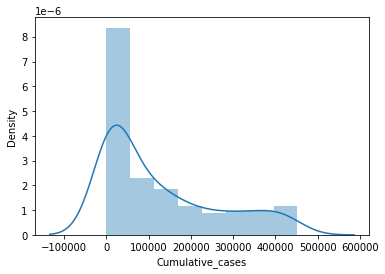

In [11]:
sns.distplot(fileku["Cumulative_cases"])

yes
yes
yes
yes


<Figure size 2160x720 with 0 Axes>

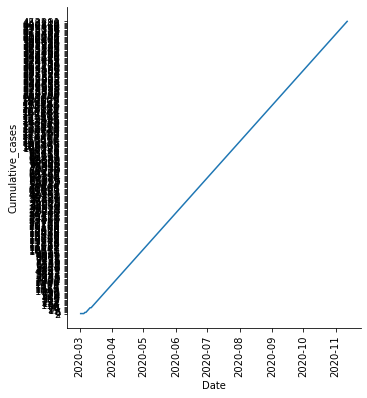

<Figure size 2160x720 with 0 Axes>

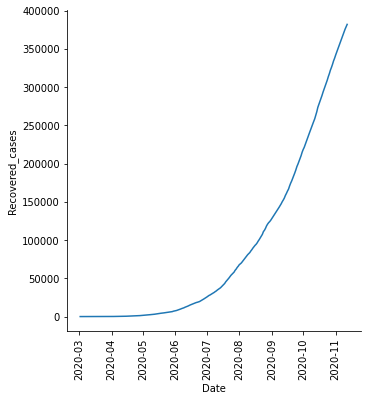

<Figure size 2160x720 with 0 Axes>

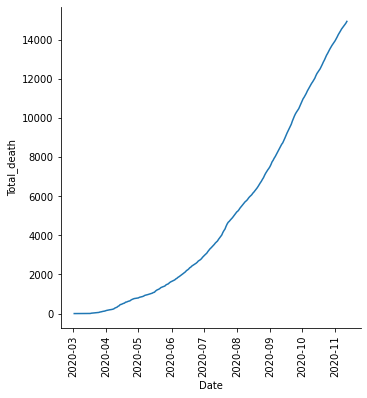

<Figure size 2160x720 with 0 Axes>

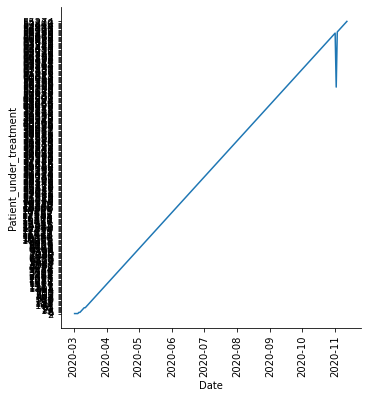

<Figure size 2160x720 with 0 Axes>

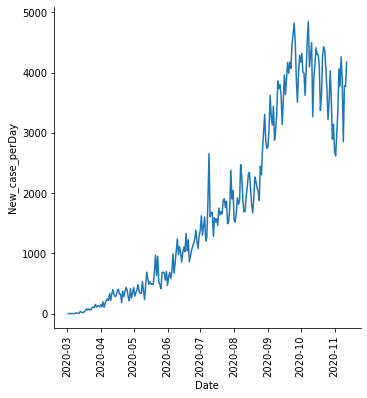

<Figure size 2160x720 with 0 Axes>

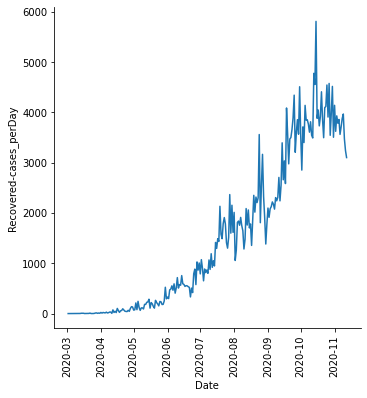

<Figure size 2160x720 with 0 Axes>

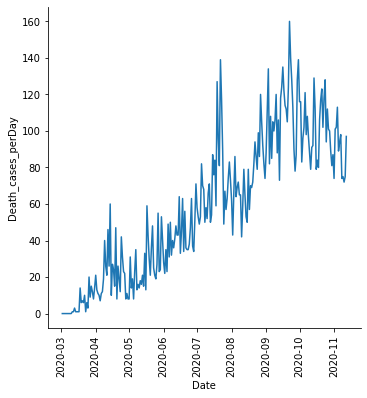

<Figure size 2160x720 with 0 Axes>

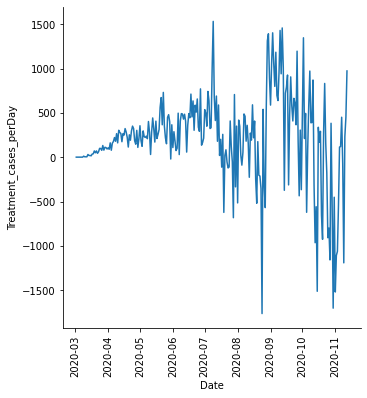

In [18]:
bandingan = fileku.columns
for i in bandingan:
    plt.figure(figsize=(30,10))
    sns.relplot(x="Date", y=i,data=fileku,kind="line")
    if(i in ["Recovered_cases_perDay","Recovered_cases","Cumulative_cases","Total_death","Patient_under_treatment"]):
        print("yes")
        plt.gca().invert_yaxis()
    plt.xticks(rotation=90)
plt.show()